# Pokemon Type Matchup Data Analysis

Coded by Luna McBride

Data Scraped from Serebii.net

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt #Plotting graphs
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-type-matchup-data/PokeTypeMatchupData.csv


In [7]:
pokemon = pd.read_csv("../input/pokemon-type-matchup-data/PokeTypeMatchupData.csv") #Open the type matchup data
pokemon.head() #Take a peek at the data

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
1,Ivysaur,#002,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
2,Venusaur,#003,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
3,Charmander,#004,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5
4,Charmeleon,#005,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5


---

# Check for Nulls

In [8]:
print(pokemon.isnull().any()) #Check for any null values

Name        False
Number      False
Normal      False
Fire        False
Water       False
Electric    False
Grass       False
Ice         False
Fighting    False
Poison      False
Ground      False
Flying      False
Psychic     False
Bug         False
Rock        False
Ghost       False
Dragon      False
Dark        False
Steel       False
Fairy       False
dtype: bool


There are no null values, but the matchups all have a * to show that is a multiplier. I will have to remove them to do math on them. I will also fix the Pokedex data.

---

# Clean the Matchup Data

In [9]:
#Type matchup values to make floats
types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting",
         "Poison", "Ground", "Flying", "Psychic", "Bug", "Rock", "Ghost",
         "Dragon", "Dark", "Steel", "Fairy"]

pokemon.replace(to_replace = "[#, *]", value = "", regex = True, inplace = True) #Remove the multiplier * and the # in the pokedex number
pokemon[types] = pokemon[types].astype(float) #Set all the matchup values to floats
pokemon["Number"] = pokemon["Number"].astype(int) #Set the pokedex number to an int
pokemon.head() #Take a peek at the dataset

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,5,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


---

# Matchup Analysis

## Type Matchup Exploration

[]

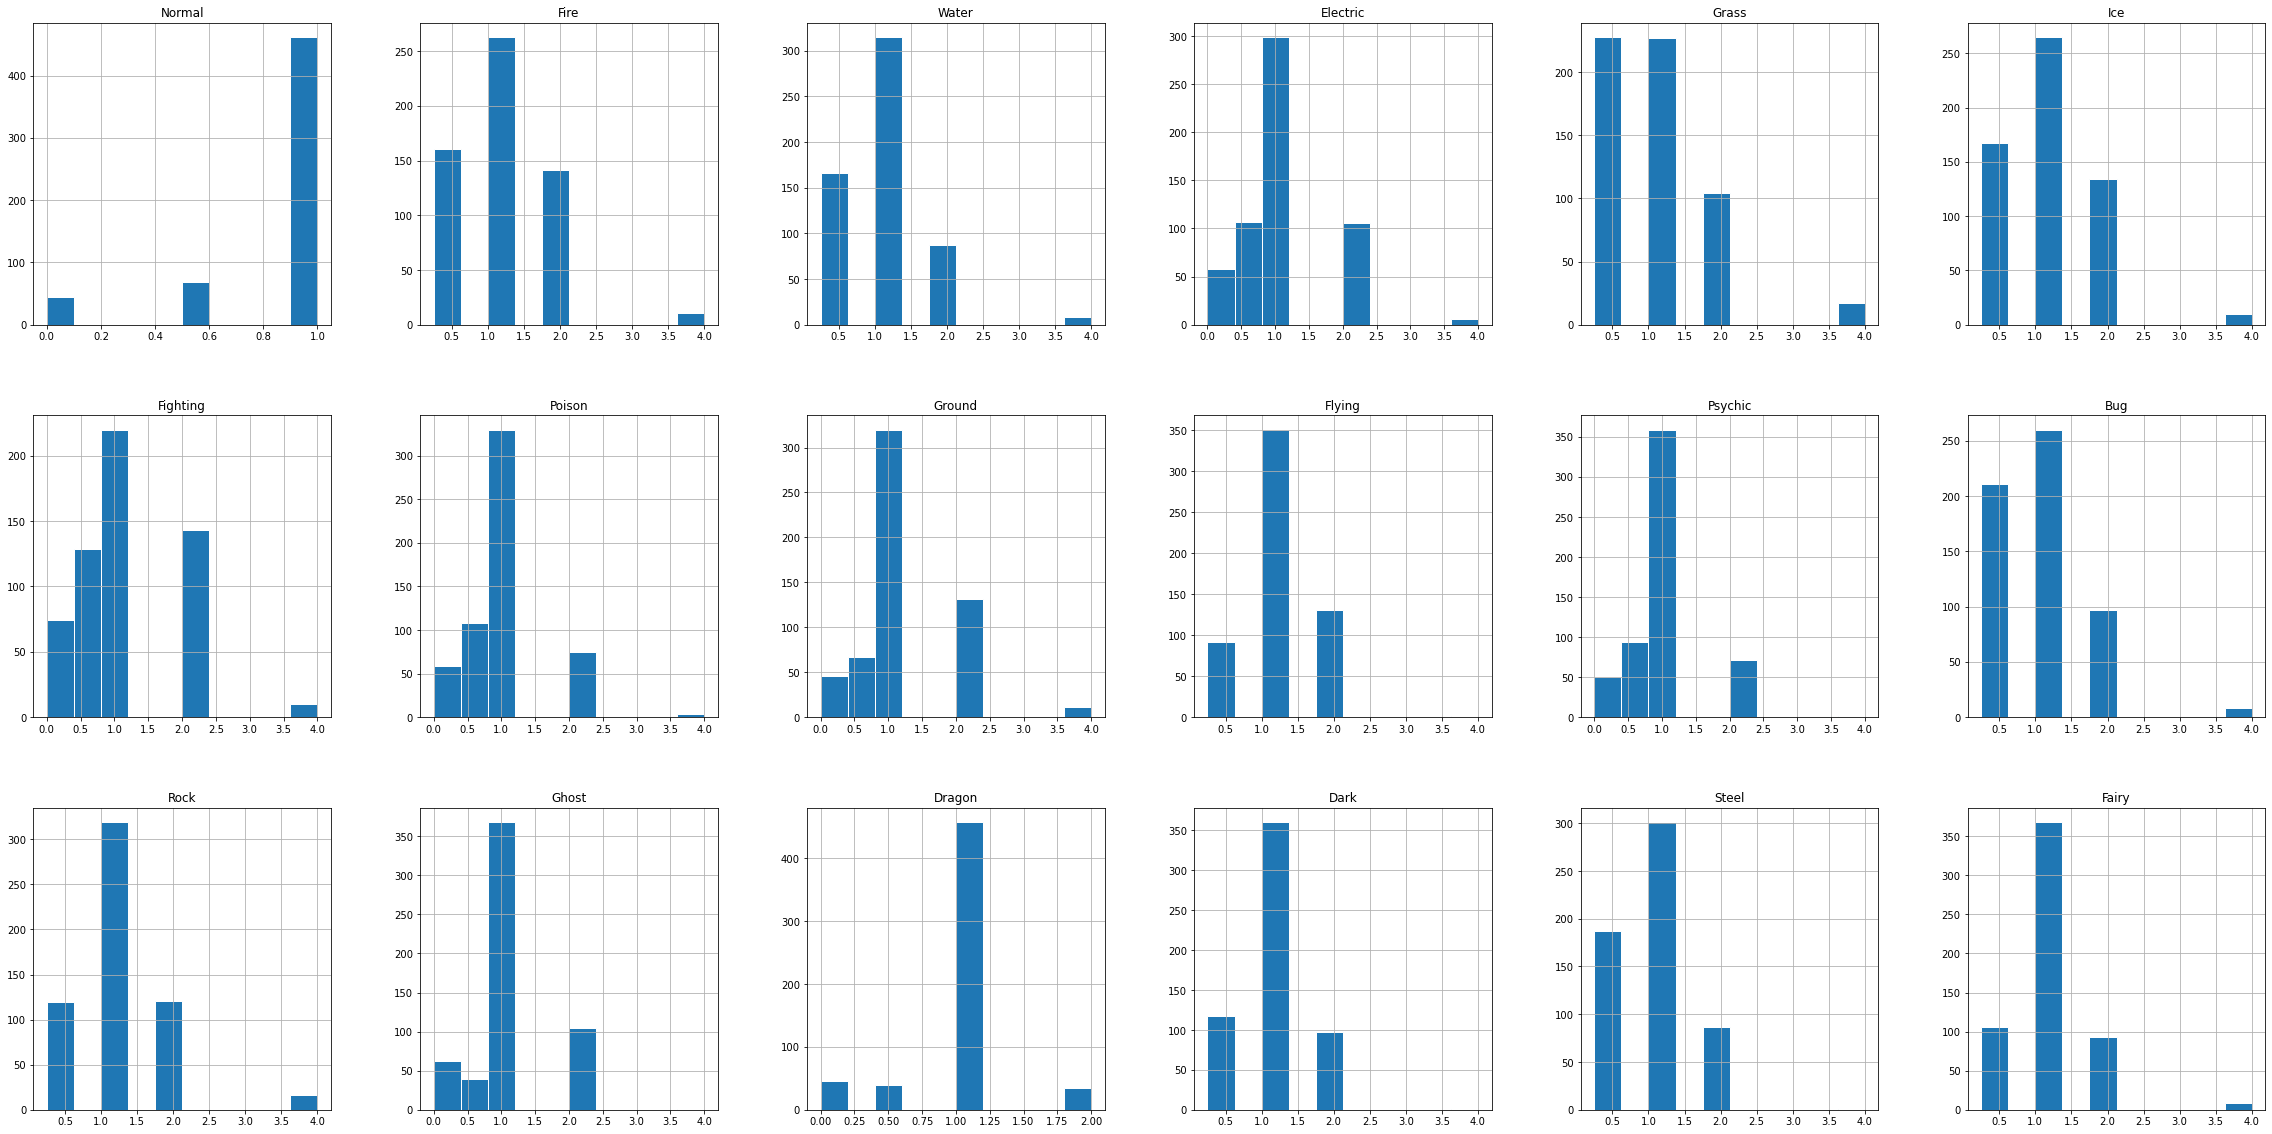

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 6, figsize = (40, 20)) #Set the figures

#For each type
for i in range(0, len(types)):
    #If else to segment the data to fit the subplots, as it has 3 rows for 18 types
    if i<6:
        a = 0
    elif i<12:
        a = 1
    else:
        a = 2
    pokemon.hist(column = types[i], edgecolor = "white", ax = axes[a][i - a * 6]) #Take a look at commonality of values

plt.plot() #Plot the data

This shows the multiplier counts for each pokemon type. The multipler means the multiplier a move of a said type will do when used on the specific Pokemon. The typical values are 0 (for unaffected), 0.5 for not very effective, 1 for normally effective, and 2 for super effective. The two other values (0.25 and 4) follow the same rules as the not very effective and super effective branches respectively, however, they only occur if the move type would be not very effective/super effective on both of the two types of the Pokemon, hence why they are much less common.

## Sums without fitting the numbers into categories

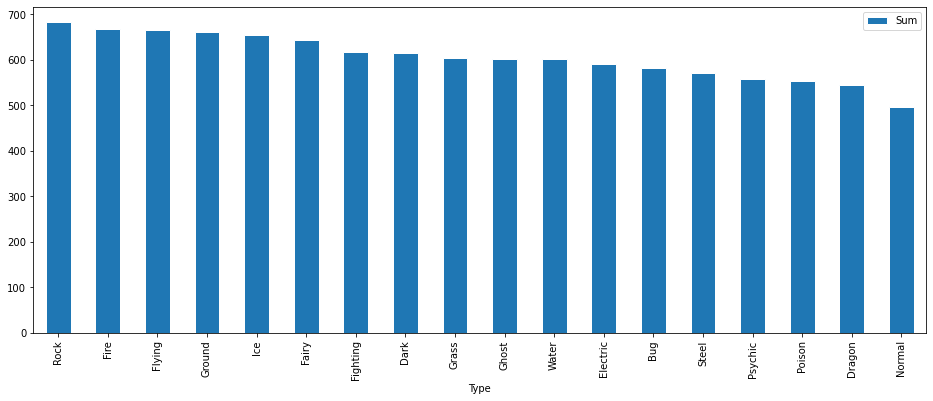

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
sums = pd.DataFrame(pokemon[types].sum(), columns = ["Sum"]) #Make a dataframe of the sums of the multipliers for each type
sums["Type"] = types #Add the types to the sums
sums = sums.sort_values(by = "Sum", ascending  = False) #Sort the sums of the multipliers
sums.plot.bar("Type", "Sum", edgecolor = "white", ax = axes) #Plot the sums

This simply sums up all the multipiers, which could possibly be skewed by x4 multipliers. Based on this, the smartest move to keep on hand is a rock type move, given that it gives the highest multiplier score.

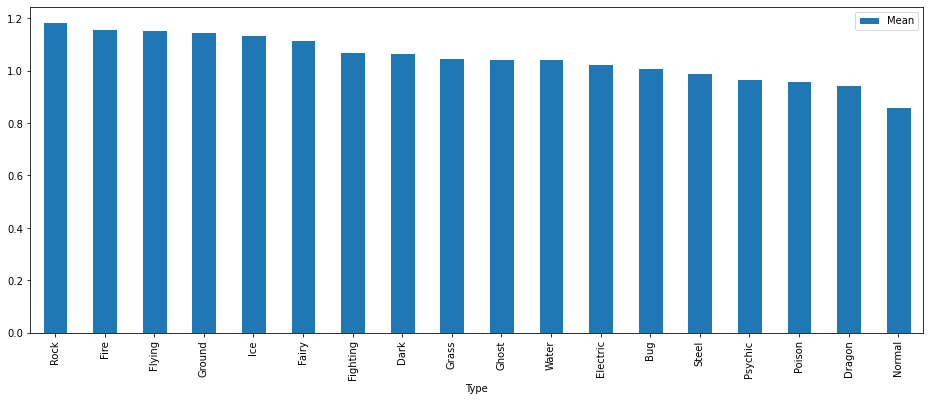

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
means = pd.DataFrame(pokemon[types].mean(), columns = ["Mean"]) #Make a dataframe of the means of the multipliers for each type
means["Type"] = types #Add the types to the means
means = means.sort_values(by = "Mean", ascending  = False) #Sort the means of the multipliers
means.plot.bar("Type", "Mean", edgecolor = "white", ax = axes) #Plot the means

This, of course, is also shown in the means. I tried to take a median for this too, but everything was 1 because most values are x1 in each set anyway.

## Fit the types to ignore dual type damage

In [13]:
#CategorizeMatchup: Removes x4 and x0.25 values to simply gage super effective and not very effective
#Input: The damage multiplier
#Output: The damage multiplier, just with x4 -> x2 and x0.25 -> x0.5
def categorizeMatchup(mult):
    if mult > 1: #If the value is more than 1
        return 2 #Return the super effective value 2
    if mult < 1 and mult > 0: #If the value is between 0 and 1
        return 0.5 #Return the not very effective value
    return mult #Return the original value if it is normal effect (1) or not effective (0)

#For loop to fix the matchups for each type column
for typ in types:
    pokemon[typ] = pokemon[typ].apply(categorizeMatchup) #Fix the effectiveness values for the type
pokemon.head() #Take a peek at the database (Remember: grass on Bulbasaur was 0.25 before)

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1,1.0,2.0,0.5,0.5,0.5,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,1.0,2.0,0.5,0.5,0.5,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,1.0,2.0,0.5,0.5,0.5,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,4,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,5,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


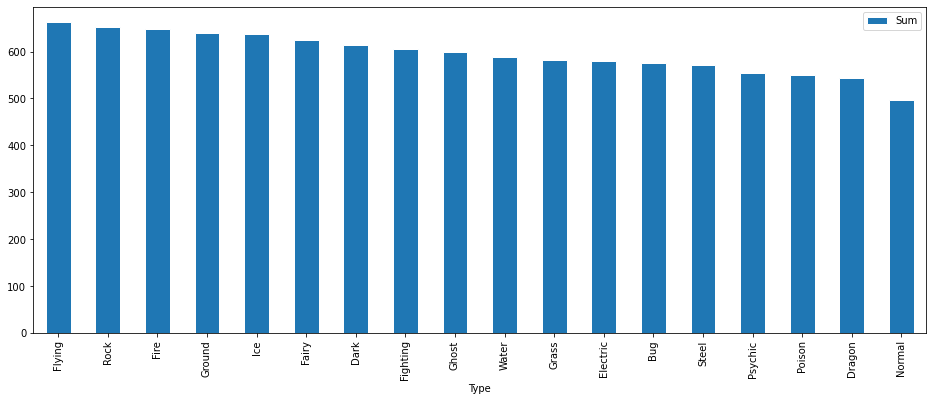

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
sums = pd.DataFrame(pokemon[types].sum(), columns = ["Sum"]) #Make a dataframe of the sums of the multipliers for each type
sums["Type"] = types #Add the types to the sums
sums = sums.sort_values(by = "Sum", ascending  = False) #Sort the sums of the multipliers
sums.plot.bar("Type", "Sum", edgecolor = "white", ax = axes) #Plot the sums

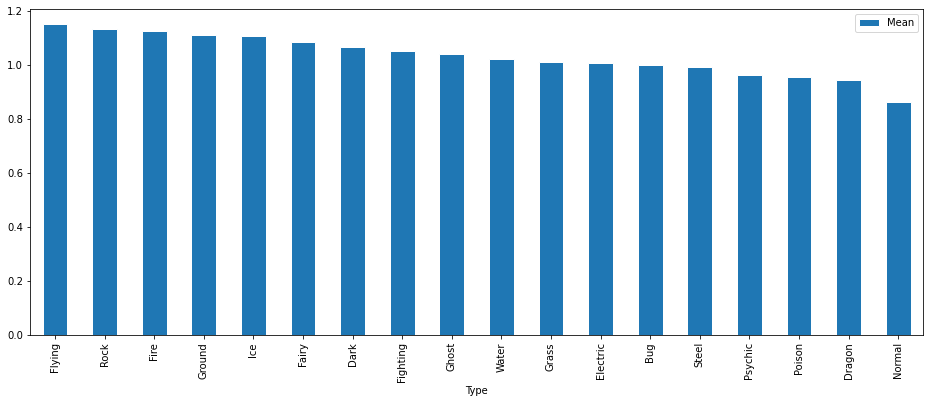

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
means = pd.DataFrame(pokemon[types].mean(), columns = ["Mean"]) #Make a dataframe of the means of the multipliers for each type
means["Type"] = types #Add the types to the means
means = means.sort_values(by = "Mean", ascending  = False) #Sort the means of the multipliers
means.plot.bar("Type", "Mean", edgecolor = "white", ax = axes) #Plot the means

After normalizing effectiveness, the flying type overtook the the rock type for most overall versitile move type. The top five still has the same types, being Flying, Rock, Fire, Ground, and Ice. This summation method only takes into account versitility when it comes to using that type against the whole range of effectiveness and not just searching for super effective like many players tend to do. That will be next (along with purely not very effective and non-effective so we have types to try and avoid), but for the best overall versitility, the flying and rock type moves take the cake. 

---

# Extremes (Not Very Effective/Super Effective) analysis

## Super Effective

This will be similar to methodology before, just eliminating the opposite values by setting them to 0

In [16]:
#SuperEffective: changes every multiplier except x2 into 0, thus not counting them in the analysis
#Input: the multiplier
#Output: 1 for super effective, 0 for not super effective
def superEffective(mult):
    if mult == 2: #If the type is super effective
        return 1 #Return 1 for isSuperEffective
    return 0 #Return a 0 for NotSuperEffective

superEff = pokemon[types].copy() #Take a copy of the types to change for super effective only

#For each type column, adjust the super effectiveness
for typ in types:
    superEff[typ] = superEff[typ].apply(superEffective) #Adjust the column following the superEffective method
superEff.head() #Take a peek at the data

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


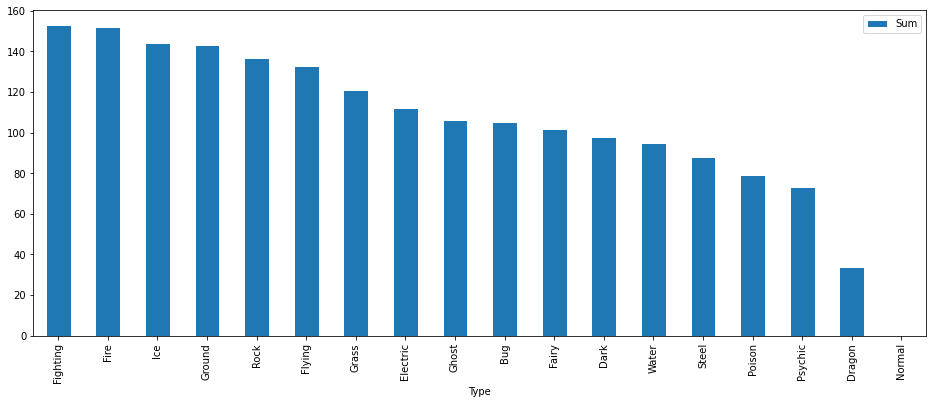

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
sums = pd.DataFrame(superEff.sum(), columns = ["Sum"]) #Make a dataframe of the sums of the multipliers for each type
sums["Type"] = types #Add the types to the sums
sums = sums.sort_values(by = "Sum", ascending  = False) #Sort the sums of the multipliers
sums.plot.bar("Type", "Sum", edgecolor = "white", ax = axes) #Plot the sums

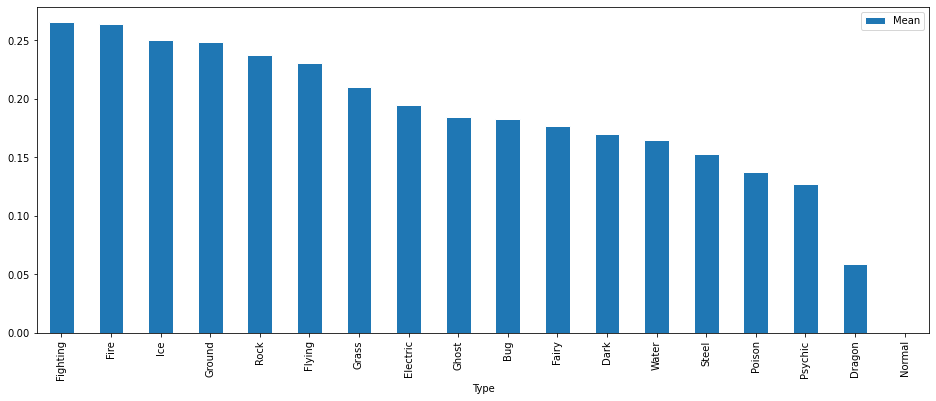

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
means = pd.DataFrame(superEff.mean(), columns = ["Mean"]) #Make a dataframe of the means of the multipliers for each type
means["Type"] = types #Add the types to the means
means = means.sort_values(by = "Mean", ascending  = False) #Sort the means of the multipliers
means.plot.bar("Type", "Mean", edgecolor = "white", ax = axes) #Plot the means

Going based purely on type matchups, the Fighting, Fire, and Ice types are the best to keep around for ensuring super effective damage. There are other considerations to keep in mind when choosing said moves, such as individual Pokemon stats and individual move power, but looking at this type effectiveness data should be a good indication of the smartest coverage moves to keep in mind. 

Also, on another note, Normal type is not super effective on any other type. Thus, there is no bar because it all went to 0.

## Not Very Effective/Non-Effective

In [19]:
#NotEffective: changes every multiplier except those less than 1 into 0, thus not counting them in the analysis
#Input: the multiplier
#Output: 1 for not very effective/not effective, 0 for effective
def notEffective(mult):
    if mult < 1: #If the type is less than effective
        return 1 #Return 1 for isNotVery/NotEffective
    return 0 #Return a 0 for Effective

notEff = pokemon[types].copy() #Take a copy of the types to change for super effective only

#For each type column, adjust the super effectiveness
for typ in types:
    notEff[typ] = notEff[typ].apply(notEffective) #Adjust the column following the superEffective method
notEff.head() #Take a peek at the data

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1
4,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1


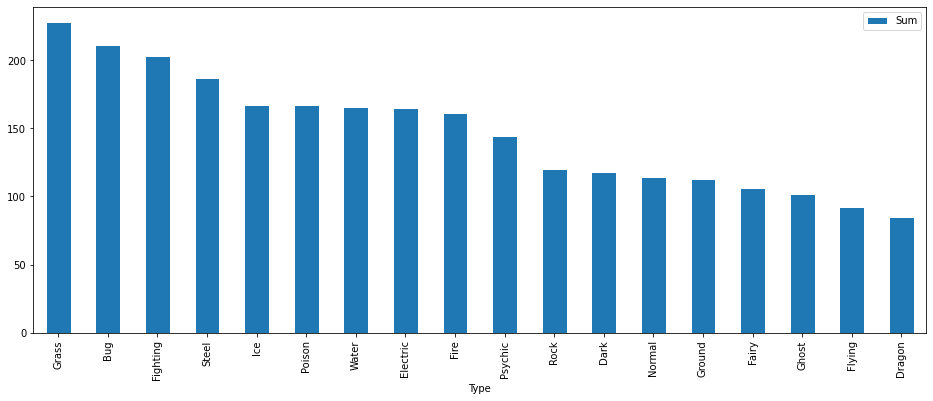

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
sums = pd.DataFrame(notEff.sum(), columns = ["Sum"]) #Make a dataframe of the sums of the multipliers for each type
sums["Type"] = types #Add the types to the sums
sums = sums.sort_values(by = "Sum", ascending  = False) #Sort the sums of the multipliers
sums.plot.bar("Type", "Sum", edgecolor = "white", ax = axes) #Plot the sums

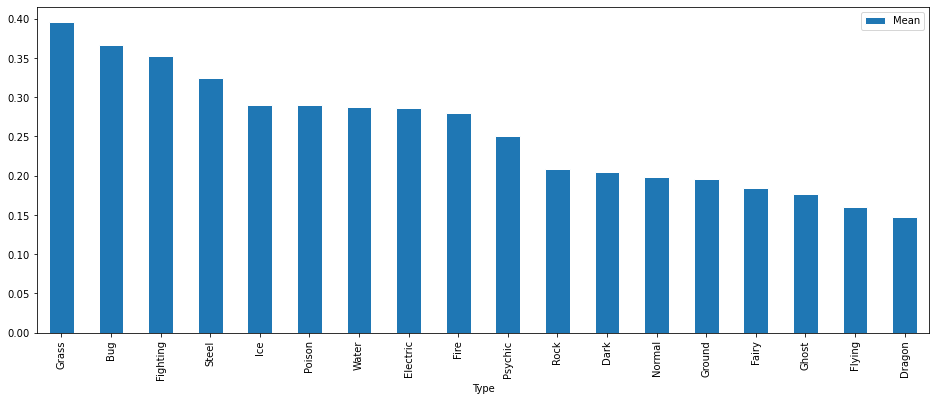

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6)) #Set the figures
means = pd.DataFrame(notEff.mean(), columns = ["Mean"]) #Make a dataframe of the means of the multipliers for each type
means["Type"] = types #Add the types to the means
means = means.sort_values(by = "Mean", ascending  = False) #Sort the means of the multipliers
means.plot.bar("Type", "Mean", edgecolor = "white", ax = axes) #Plot the means

The top three types to avoid for more general usage are Grass, Bug, and Fighting. Interestingly, Fighting is on both the super effective and non effective top threes. This shows that, while the beginning analysis emphasized types for more general usage, the super effective and non effective categories are for more specific usage. The fighting type likely is on here due to ghosts being immune to it, thus being it was not very high on the general usage graph but having highs on both the specific effectiveness graphs. 

The biggest one on here is grass, which makes sense with seven types that resist its moves. That makes it less generally versitile. The tradeoff, however, is being strong against water types, which is the most abundant type in all of Pokemon. This means it has very specific usage, and thus this methodology weighs heavily against the type. Sums and means in this case emphasize generality, so while these types have their niches, these types will not have a more general appeal given that you have no idea what is coming out next.

---

# Conclusion

This is not meant to be a guide to what is absolutely necessary for every battle. There are more factors than just type effectiveness. Pokemon stats, move damage, move effects, held item, and abilites will most definitely change what type of move is likely to be used on a case by case basis. This also assumes that any Pokemon in the current Galar dex can appear in any battle with equal probability, which is not true by modern battle standards.

The point of using this data, however, was not to compare all these different factors to determine the best overall choices. It was instead to compare type matchups and move types for a more general appeal. Of course Pokemon like Cinderace and Togekiss are going to come out more given their popularity and thus they are bigger threats to keep in mind, but knowing the more general use case and preparing accordingly can help for Pokemon that might not be within the popular picks club. This is actually the point of why I wanted to look at type matchup data in this way specifically. Watching the top players go against similar choices is not nearly as interesting as when someone picks an unusual Pokemon, thus putting emphasis onto what general use moves they have to counter the edge cases. 

Those general use move types being Flying, Rock, and Fire. For higher damage multipliers but more specific usage, Fighting and Ice fit the mold best.